<a href="https://colab.research.google.com/github/UIUC-CS598-S23-TEAM139/23Spring-CS598-Final-Project/blob/main/psychotic_disorder_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import io

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# The deep learning model was trained using Keras functional API, 
# running on top of TensorFlow in Google Colaboratory online platform 
# with Python 3.6 notebook.
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model, Model, Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D

**About the original paper:**
*   Title: Application of deep and machine learning techniques for multi-label classification performance on psychotic disorder diseases
*   Authors: Israel Elujide, Stephen G. Fashoto, Bunmi Fashoto, Elliot Mbunge, Sakinat O. Folorunso, Jeremiah O. Olamijuwon
*   Dataset: The data were obtained from Yaba Psychiatry Hospital, Yaba, Lagos State, Nigeria by Adejumo et al.
*   Link: https://www.sciencedirect.com/science/article/pii/S2352914821000356

# Dependencies

**Basic**

Process the file:
*   from google.colab import files

Process the data:
*   import numpy as np
*   import pandas as pd

Split data into train and test subsets:
*   from sklearn.model_selection import train_test_split


**Balancing data**

*   from imblearn.over_sampling import SMOTE


**Machine learning**

*   from sklearn.neural_network import MLPClassifier
*   from sklearn.svm import LinearSVC
*   from sklearn.ensemble import RandomForestClassifier
*   from sklearn.tree import DecisionTreeClassifier

**Deep learning**

Keras funtional API:
*   from tensorflow import keras
*   from keras.models import load_model, Model, Sequential # Sequential groups a linear stack of layers into a tf.keras.Model.
*   from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D



# Import Files

**How to access to the dataset:**

Please go the Appendix A of the [paper](https://www.sciencedirect.com/science/article/pii/S2352914821000356#cebib0010) or download through this [link](https://www.sciencedirect.com/science/article/pii/S2352340917303487#ec0010):


*   In the section 'Extras', please click on 'Download all' to get the cvs file.
*   Click on 'Choose Files' to upload the csv file here.



In [1]:
# Upload data file if using google colab
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']),encoding='cp1252')

In [ ]:
df

In [ ]:
set(df['Bipolar'])

# Data Preprocessing

**Encode data**


*   The Negative or N values are encoded as 0 and the Positive or P values are encoded as 1.
*   Add 'target' column with all combinations with more than 6 occurrences.



In [ ]:
## Binary and One-hot encoding for categorial variables

# Encode 'sex' (M/F) into binary value
df['sex'].replace(['M', 'F'], [0, 1], inplace=True)

# Encode 'faNoily_status' (No/Yes) into binary value
df['faNoily_status'].replace(['No', 'Yes'], [0, 1], inplace=True)

# Encode 'genetic' (No/Yes) into binary value
df['genetic'].replace(['No', 'Yes'], [0, 1], inplace=True)

# Encode 'status' (S/M) into binary value
df['status'].replace(['S', 'M'], [0, 1], inplace=True)

# Encode 'loss_of_parent' (No/Yes) into binary value
df['loss_of_parent'].replace(['No', 'Yes'], [0, 1], inplace=True)

# Encode 'divorse' (No/Yes) into binary value
df['divorse'].replace(['No', 'Yes'], [0, 1], inplace=True)

# Encode 'Injury' (No/Yes) into binary value
df['Injury'].replace(['No', 'Yes'], [0, 1], inplace=True)

# Encode 'Spiritual_consult' (No/Yes) into binary value
df['Spiritual_consult'].replace(['No', 'Yes'], [0, 1], inplace=True)



# region
dum_religion = pd.get_dummies(df.religion, prefix='religion')
df = pd.concat([df, dum_religion], axis=1)
df.drop('religion', inplace=True, axis=1)

# occupation
dum_occ = pd.get_dummies(df.occupation, prefix='occupation')
df = pd.concat([df, dum_occ], axis=1)
df.drop('occupation', inplace=True, axis=1)

# agecode
dum_agecode = pd.get_dummies(df.agecode, prefix='agecode')
df = pd.concat([df, dum_agecode], axis=1)
df.drop('agecode', inplace=True, axis=1)



# Insominia (N/P)
df['Insominia'].replace(['N', 'P'], [0, 1], inplace=True)

# MBD (N/P)
df['MBD'].replace(['N', 'P'], [0, 1], inplace=True)

# Bipolar (N/P)
df['Bipolar'].replace(['N', 'P'], [0, 1], inplace=True)

# shizopherania (N/P)
df['shizopherania'].replace(['N', 'P'], [0, 1], inplace=True)

# vascula_demetia (N/P)
df['vascula_demetia'].replace(['N', 'P'], [0, 1], inplace=True)

data = df.copy()

data

Our target variables are in this order: Insomnia, schizophrenia, vascular dementia, ADHD and Bi-polar disorder.

In [ ]:
df['target'] = df['Insominia'].astype(str) + df['shizopherania'].astype(str) + df['vascula_demetia'].astype(str) + df['MBD'].astype(str) + df['Bipolar'].astype(str)

df

In [ ]:
# Paper page 9 - "As such, we removed all combinations with less than 6 occurrences."
df = df.groupby('target').filter(lambda x: len(x) > 6)

imbalanced_data = df.copy()
# we have 'target' for these values
del imbalanced_data['Insominia']
del imbalanced_data['shizopherania']
del imbalanced_data['vascula_demetia']
del imbalanced_data['MBD']
del imbalanced_data['Bipolar']

balanced_data = df.copy()
del balanced_data['target']

In [ ]:
imbalanced_data

Use 'Insominia' data

In [ ]:
balanced_data['Insominia']

# Balance dataset with SMOTE
Just try SMOTE


In [ ]:
# y = balanced_data.pop('Insominia')
# X = balanced_data

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# X_train  

In [ ]:
# every sample had a total of 101 samples each
# smote = SMOTE(random_state=101)
# X_train_balance, y_train_balance = smote.fit_resample(X_train, y_train.values.ravel())
# X_train_balance

# Multi-Label Classification Model on dataset with class imbalance.

# Machine learning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Train a Multilayer Perceptron (MLP), Support Vector Machines (SVM), Random Forest (RF) and Decision Tree (DT) on the training data (which is 80% of the whole data). The four algorithms are evaluated on the test set (which is 20% of the sampled data). The accuracy and balanced accuracy are as presented in Table 3.

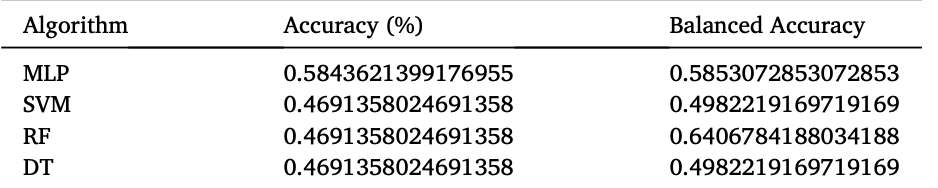


In [ ]:
temp = imbalanced_data.copy()
y_multi_imbalanced = temp.pop('target')
X_multi_imbalanced = temp
X_train, X_test, y_train, y_test = train_test_split(X_multi_imbalanced, y_multi_imbalanced, test_size=0.2)

In [ ]:
results = []

Multilayer Perceptron (MLP)

In [ ]:
MLP = MLPClassifier()
MLP.fit(X_train, y_train)
mlp_score = MLP.score(X_test, y_test)
results.append(f"Imbalanced data - MLP: {mlp_score}")
print(f"MLP for imbalanced data = {mlp_score}")

Support Vector Machines (SVM)

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svm_score = svc.score(X_test, y_test)
results.append(f"Imbalanced data - SVM: {svm_score}")
print(f"SVM for imbalanced data = {svm_score}")

Random Forest (RF)

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
rf_score = RF.score(X_test, y_test)
results.append(f"Imbalanced data - RF: {rf_score}")
print(f"RF for imbalanced data = {rf_score}")

Decision Tree (DT)

In [ ]:
decistion_tree = DecisionTreeClassifier()
decistion_tree.fit(X_train, y_train)
dt_score = decistion_tree.score(X_test, y_test)
results.append(f"Imbalanced data - DT: {dt_score}")
print(f"DT for imbalanced data = {dt_score}")

Deep learning using Neural Network


Use Neural Network in this paper:
https://keras.io/guides/sequential_model/

The architectural setup presented in Fig. 4a and b are 3-layer deep fully-connected network with the RELU activation function and architectural layer are 15–20–20-40–1 and 15-20–20-40–5 respectively. The training data is split into a 30% validation set running for 40 epochs with an early stop monitor on validation loss. The optimizer is Adam with a learning rate of 0.01.


*   Drop-out is chosen over L1 and L2 regularisation in this study
*   Sigmoid and ReLU is the activation function used in this study.
*   Optimizer is Adam with a learning rate of 0.01.
*   The loss function for training is a binary cross-entropy and evaluation metrics accuracy.



In [ ]:
def MultiLabelNN():
  # Create 3 layers
  # page 5 - Fig 4.
  # found shape=(10, 22)
  input = Dense(15, input_dim=22, activation="relu", name="Input")
  hidden_layer1 = Dense(20, activation="relu", name="layer1")
  hidden_layer2 = Dense(20, activation="relu", name="layer2") 
  hidden_layer3 = Dense(40, activation="relu", name="layer3") 
  output = Dense(5, activation="sigmoid", name="Output") 

  model = Sequential()

  model.add(input)
  model.add(Dropout(0.1))
  model.add(hidden_layer1)
  model.add(Dropout(0.1))
  model.add(hidden_layer2)
  model.add(Dropout(0.1))
  model.add(hidden_layer3)
  model.add(output)

  optimizer = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [ ]:
temp = df.copy()
y_multi_nn = pd.DataFrame([temp.pop(x) for x in ['Insominia', 'shizopherania', 'vascula_demetia', 'MBD', 'Bipolar']]).T

X_multi_nn = temp

# test
X_train, X_test, y_train, y_test = train_test_split(X_multi_nn, y_multi_nn, test_size=0.2)

# validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3)

model = MultiLabelNN()
model.fit(
    tf.convert_to_tensor(np.asarray(X_train).astype('int')), 
    tf.convert_to_tensor(y_train),
    epochs=40, 
    batch_size=10
)

# test
test = model.evaluate(tf.convert_to_tensor(np.asarray(X_test).astype('int')), tf.convert_to_tensor(y_test), batch_size=10)

# validation
validation = model.evaluate(tf.convert_to_tensor(np.asarray(X_validation).astype('int')), tf.convert_to_tensor(y_validation), batch_size=10)

print(f'Training Loss and Accuracy (test): {test}')
print(f'Training Loss and Accuracy (validation): {validation}')
results.append(f"Imbalanced data - Multi-label NN Loss and Accuracy(test): {test}")
results.append(f"Imbalanced data - Multi-label NN Loss and Accuracy(validation): {validation}")

# Single-Label Classification Model on dataset with class imbalance
Using Neural Network with 3-layer

In [ ]:
def SingleLabelNN():
  # Create 3 layers
  # page 5 - Fig 4.
  # found shape=(10, 25)
  input = Dense(15, input_dim=25, activation="relu", name="Input")
  hidden_layer1 = Dense(20, activation="relu", name="layer1")
  hidden_layer2 = Dense(40, activation="relu", name="layer2") 
  hidden_layer3 = Dense(50, activation="relu", name="layer3") 
  output = Dense(1, activation="sigmoid", name="Output") 

  model = Sequential()

  model.add(input)
  model.add(Dropout(0.2))
  model.add(hidden_layer1)
  model.add(Dropout(0.2))
  model.add(hidden_layer2)
  model.add(Dropout(0.2))
  model.add(hidden_layer3)
  model.add(Dropout(0.2))
  model.add(output)

  optimizer = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [ ]:
diseases = ['Insominia', 'shizopherania', 'vascula_demetia', 'MBD', 'Bipolar']

losses = []

for d in diseases:
  X = data.copy()
  y = X.pop(d)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3)

  model = SingleLabelNN()
  model.fit(
      tf.convert_to_tensor(np.asarray(X_train).astype('int')), 
      tf.convert_to_tensor(y_train),
      epochs=40, 
      batch_size=10
  )

  # test
  test = model.evaluate(tf.convert_to_tensor(np.asarray(X_test).astype('int')), tf.convert_to_tensor(y_test), batch_size=10)

  # validation
  validation = model.evaluate(tf.convert_to_tensor(np.asarray(X_validation).astype('int')), tf.convert_to_tensor(y_validation), batch_size=10)

  losses.append(f'{d} - Training Loss and Accuracy (test): {test}')
  losses.append(f'{d} - Training Loss and Accuracy (validation): {validation}')
  results.append(f"Imbalanced data - Single-label {d} NN Loss and Accuracy(test): {test}")
  results.append(f"Imbalanced data - Single-label {d} NN Loss and Accuracy(validation): {validation}")

for l in losses:
  print(l)

# Multi-Label Classification Model on dataset without class imbalance

In [ ]:
temp = imbalanced_data.copy()
y_balanced = temp.pop('target')
X_balanced = temp
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2)

# balance data using SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train.values.ravel())

Multilayer Perceptron (MLP)

In [ ]:
MLP = MLPClassifier()
MLP.fit(X_train_balanced, y_train_balanced)
mlp_score = MLP.score(X_test, y_test)
results.append(f"Balanced data - MLP: {mlp_score}")
print(f"MLP for balanced data = {mlp_score}")

Support Vector Machines (SVM)

In [ ]:
svc = LinearSVC()
svc.fit(X_train_balanced, y_train_balanced)
svm_score = svc.score(X_test, y_test)
results.append(f"Balanced data - SVM: {svm_score}")
print(f"SVM for balanced data = {svm_score}")

Random Forest (RF)

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_balanced, y_train_balanced)
rf_score = RF.score(X_test, y_test)
results.append(f"Balanced data - RF: {rf_score}")
print(f"RF for balanced data = {rf_score}")

Decision Tree (DT)

In [ ]:
decistion_tree = DecisionTreeClassifier()
decistion_tree.fit(X_train_balanced, y_train_balanced)
dt_score = decistion_tree.score(X_test, y_test)
results.append(f"Balanced data - DT: {dt_score}")
print(f"DT for balanced data = {dt_score}")

Deep learning using Neural Network

In [ ]:
def MultiLabelNN():
  # Create 3 layers
  # page 5 - Fig 4.
  # found shape=(None, 21)
  input = Dense(15, input_dim=21, activation="relu", name="Input")
  hidden_layer1 = Dense(20, activation="relu", name="layer1")
  hidden_layer2 = Dense(20, activation="relu", name="layer2") 
  hidden_layer3 = Dense(40, activation="relu", name="layer3") 
  output = Dense(5, activation="sigmoid", name="Output") 

  model = Sequential()

  model.add(input)
  model.add(Dropout(0.1))
  model.add(hidden_layer1)
  model.add(Dropout(0.1))
  model.add(hidden_layer2)
  model.add(Dropout(0.1))
  model.add(hidden_layer3)
  model.add(output)

  optimizer = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [ ]:
from tensorflow.python.ops.gen_logging_ops import PrintV2

X_balanced_new, y_balanced_new = smote.fit_resample(X_balanced, y_balanced.values.ravel())

# Re-split the target column back into 5 diseases columns. 
separated_diseases = []
for value in y_balanced_new.ravel():
  item = []
  for v in value:
    item.append(v)
  separated_diseases.append(item)

y = pd.DataFrame(separated_diseases, columns = ['Insominia', 'shizopherania', 'vascula_demetia', 'MBD', 'Bipolar']).astype('int')


X_train, X_test, y_train, y_test = train_test_split(X_balanced_new, y, test_size=0.2)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3)

model = MultiLabelNN()
model.fit(
    tf.convert_to_tensor(np.asarray(X_train).astype('int')), 
    tf.convert_to_tensor(y_train),
    epochs=40, 
    batch_size=10
)

# test
test = model.evaluate(tf.convert_to_tensor(np.asarray(X_test).astype('int')), tf.convert_to_tensor(y_test), batch_size=10)

# validation
validation = model.evaluate(tf.convert_to_tensor(np.asarray(X_validation).astype('int')), tf.convert_to_tensor(y_validation), batch_size=10)

print(f'Training Loss and Accuracy (test): {test}')
print(f'Training Loss and Accuracy (validation): {validation}')

results.append(f"Balanced data - Multi-label NN Loss and Accuracy(test): {test}")
results.append(f"Balanced data - Multi-label NN Loss and Accuracy(validation): {validation}")

# Single-Label Classification Model on dataset without class imbalance

In [ ]:
def SingleLabelNN():
  # Create 3 layers
  # page 5 - Fig 4.
  # found shape=(None, 25)
  input = Dense(15, input_dim=25, activation="relu", name="Input")
  hidden_layer1 = Dense(20, activation="relu", name="layer1")
  hidden_layer2 = Dense(40, activation="relu", name="layer2") 
  hidden_layer3 = Dense(50, activation="relu", name="layer3") 
  output = Dense(1, activation="sigmoid", name="Output") 

  model = Sequential()

  model.add(input)
  model.add(Dropout(0.4))
  model.add(hidden_layer1)
  model.add(Dropout(0.4))
  model.add(hidden_layer2)
  model.add(Dropout(0.4))
  model.add(hidden_layer3)
  model.add(Dropout(0.4))
  model.add(output)

  optimizer = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [ ]:
losses_balanced = []

for d in diseases:
  X = balanced_data.copy()
  y = X.pop(d)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3)

  # balance data with SMOTE
  X_train, y_train = smote.fit_resample(X_train, y_train.values.ravel())
  X_validation, y_validation = smote.fit_resample(X_validation, y_validation.values.ravel())

  model = SingleLabelNN()
  model.fit(
      tf.convert_to_tensor(np.asarray(X_train).astype('int')), 
      tf.convert_to_tensor(y_train),
      epochs=40, 
      batch_size=10
  )

  # test
  test = model.evaluate(tf.convert_to_tensor(np.asarray(X_test).astype('int')), tf.convert_to_tensor(y_test), batch_size=10)

  # validation
  validation = model.evaluate(tf.convert_to_tensor(np.asarray(X_validation).astype('int')), tf.convert_to_tensor(y_validation), batch_size=10)

  losses_balanced.append(f'{d} - Training Loss and Accuracy (test): {test}')
  losses_balanced.append(f'{d} - Training Loss and Accuracy (validation): {validation}')

  results.append(f"Balanced data - Single-label {d} NN Loss and Accuracy(test): {test}")
  results.append(f"Balanced data - Single-label {d} NN Loss and Accuracy(validation): {validation}")

for l in losses_balanced:
  print(l)

In [ ]:
print(results)